In [ ]:
#!pip install tensorflow-gpu

In [ ]:
!nvidia-smi

Thu Dec 15 05:41:54 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0    34W /  70W |   9016MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [143]:
#mounting colab

from google.colab import drive

drive.mount('/content/Gdrive')

Drive already mounted at /content/Gdrive; to attempt to forcibly remount, call drive.mount("/content/Gdrive", force_remount=True).


**Importing libraries**

In [144]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from keras.applications.inception_v3 import InceptionV3
from glob import glob
from keras import layers
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model

In [ ]:
#unzipping the file

#!unzip /content/facialExpression.zip

In [145]:
#resizing the images to this

IMAGE_SIZE = [224,224]

train_path = '/content/Gdrive/MyDrive/Facial_Expression/CK+48'

In [146]:
inception = InceptionV3(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)

In [147]:
#dont train existing weights

for layer in inception.layers:
  layer.trainable = False

In [148]:
# setting up labels

folders = glob('/content/Gdrive/MyDrive/Facial_Expression/CK+48/*')

In [149]:
folders

['/content/Gdrive/MyDrive/Facial_Expression/CK+48/anger',
 '/content/Gdrive/MyDrive/Facial_Expression/CK+48/contempt',
 '/content/Gdrive/MyDrive/Facial_Expression/CK+48/disgust',
 '/content/Gdrive/MyDrive/Facial_Expression/CK+48/fear',
 '/content/Gdrive/MyDrive/Facial_Expression/CK+48/happy',
 '/content/Gdrive/MyDrive/Facial_Expression/CK+48/sadness',
 '/content/Gdrive/MyDrive/Facial_Expression/CK+48/surprise']

In [150]:
#layers

x = Flatten()(inception.output)

In [151]:
prediction = Dense(len(folders), activation = 'softmax')(x)

In [152]:
#create model object

model = Model(inputs = inception.input, outputs = prediction)

In [153]:
#viewing model structure

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 111, 111, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_188 (Batch  (None, 111, 111, 32  96         ['conv2d_188[0][0]']             
 Normalization)                 )                                                           

In [154]:
#compiling model

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [155]:
#preprocessing the image

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [156]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [157]:
training_set = train_datagen.flow_from_directory('/content/Gdrive/MyDrive/Facial_Expression/CK+48', target_size = (224,224), batch_size = 32, class_mode = 'categorical')

Found 981 images belonging to 8 classes.


In [158]:
len(training_set)

31

In [159]:
#fit the model

hist = model.fit_generator(training_set, epochs = 10, steps_per_epoch =len(training_set))

<ipython-input-159-794a7b949e75>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(training_set, epochs = 10, steps_per_epoch =len(training_set))


Epoch 1/10


InvalidArgumentError: ignored

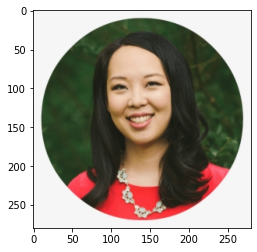

In [160]:
#predicting

img = cv2.imread('/content/Gdrive/MyDrive/Facial_Expression/trial.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [161]:
resize = tf.image.resize(img,(224,224))


In [162]:
pred = model.predict(np.expand_dims(resize/255.0,0))

1/1 [==============================] - 2s 2s/step


In [163]:
pred

array([[0.21485825, 0.06826104, 0.0704906 , 0.07154256, 0.23811454,
        0.28035608, 0.05637687]], dtype=float32)

In [164]:
#model.save('Emotion_predictor.h5')
